In [90]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# pipeline functions
from pipeline import *

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# run plotly in jupyter
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('data/terror_db.csv')

In [92]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [93]:
sec_df = pd.read_csv('data/2nd_edu.csv')
no_df = pd.read_csv('data/no_edu.csv')

In [94]:
combined = create_combined_frame(df, sec_df)
sec_df_merged = event_count(combined)

In [95]:
sec_df_merged.corr()

,education,nattacks
education,1.000000,-0.053919
nattacks,-0.053919,1.000000


In [96]:
fig = px.scatter(sec_df, x="education", y="nattacks", trendline="lowess", color='education')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', 'Country Name'] but received: education

In [9]:
combined = create_combined_frame(df, no_df)
no_df_merged = event_count(combined)

In [10]:
no_df_merged.corr()

,education,nattacks
education,1.000000,0.065827
nattacks,0.065827,1.000000


In [11]:
fig = px.scatter(no_df, x="education", y="nattacks", trendline="ols", color='education')
fig.show()

#### Top 30

In [18]:
sec_combined = create_combined_frame(df, sec_df)
top_30 = sec_combined.sort_values(by='total_attacks', ascending=False).iloc[:30, :]

thirty_sec_df = event_count(top_30)

In [19]:
thirty_sec_df.corr()

,education,nattacks
education,1.000000,-0.141933
nattacks,-0.141933,1.000000


In [20]:
fig = px.scatter(thirty_sec_df, x="education", y="nattacks", trendline="ols", color='education')
fig.show()

In [21]:
no_combined = create_combined_frame(df, no_df)
top_30 = no_combined.sort_values(by='total_attacks', ascending=False).iloc[:30, :]

thirty_no_df = event_count(top_30)

In [22]:
thirty_no_df.corr()

,education,nattacks
education,1.000000,0.169071
nattacks,0.169071,1.000000


In [23]:
fig = px.scatter(thirty_no_df, x="education", y="nattacks", trendline="ols", color='education')
fig.show()

In [24]:
out_sec_combined = create_combined_frame(df, sec_df)

q_low = out_sec_combined["total_attacks"].quantile(0.01)
q_hi  = out_sec_combined["total_attacks"].quantile(0.99)

sec_df_filtered = out_sec_combined[(out_sec_combined["total_attacks"] < q_hi) & (out_sec_combined["total_attacks"] > q_low)]

sec_df_filt = event_count(sec_df_filtered)

In [25]:
sec_df_filt.corr()

,education,nattacks
education,1.000000,-0.172432
nattacks,-0.172432,1.000000


In [26]:
fig = px.scatter(sec_df_filt, x="education", y="nattacks", trendline="ols", color='education')
fig.show()

In [27]:
out_no_combined = create_combined_frame(df, no_df)

q_low = out_no_combined["total_attacks"].quantile(0.05)
q_hi  = out_no_combined["total_attacks"].quantile(0.95)

no_df_filtered = out_no_combined[(out_no_combined["total_attacks"] < q_hi) & (out_no_combined["total_attacks"] > q_low)]

no_df_filt = event_count(no_df_filtered)

In [28]:
no_df_filt.corr()

,education,nattacks
education,1.000000,-0.038685
nattacks,-0.038685,1.000000


In [29]:
fig = px.scatter(no_df_filt, x="education", y="nattacks", trendline="ols", color='education')
fig.show()

#### Hypothesis Testing

In [30]:
'''
Is there a relationship between education and attacks?
'''

'\nIs there a relationship between education and attacks?\n'

In [33]:
combined = create_combined_frame(df, sec_df)


# sec_df_merged = event_count(combined)
combined

AttributeError: 'DataFrame' object has no attribute 'iyear'

In [34]:
'''
How does this change in 5 year increments?
'''

lst_df = event_count(combined)

In [88]:
med = lst_df.education.median()
mean = lst_df.education.median()

low_ed = lst_df[lst_df.education <= med]
high_ed = lst_df[lst_df.education > med]



fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=low_ed.education, y=low_ed.nattacks, mode='markers',
              marker_color=low_ed.education, text=low_ed.education),
    row=1, col=1)

fig.add_trace(
    go.Scatter(x=high_ed.education, y=high_ed.nattacks, mode='markers',
              marker_color=high_ed.education),
    row=1, col=2)

fig.update_layout(
    height=500, width=1000, 
    title_text="Comparing Low Education vs High Education",
    showlegend=True,
    title_x=0.5)


fig.update_xaxes(title_text="% Women Completed Secondary School", row=1, col=1)
fig.update_xaxes(title_text="% Women Completed Secondary School", row=1, col=2)

fig.update_yaxes(title_text="Number of Terrorist Events", row=1, col=1)
fig.update_yaxes(title_text="Number of Terrorist Events", range=[-800, 12000], row=1, col=2)
fig.show()

In [ ]:
t_test = stats.ttest_ind(low_ed.nattacks, high_ed.nattacks)
pearson = stats.pearsonr(low_ed.nattacks, high_ed.nattacks)
spearman = stats.spearmanr(low_ed.nattacks, high_ed.nattacks)
print(t_test)
print("_"*40)
print(pearson)
print("_"*40)
print(spearman)

In [61]:
# q_low = combined["total_attacks"].quantile(0.05)
# q_hi  = combined["total_attacks"].quantile(0.95)

# df_filtered = combined[(combined["total_attacks"] < q_hi) & (combined["total_attacks"] > q_low)]


In [101]:
stats.pearsonr(sec_df_merged.education, sec_df_merged.nattacks.fillna(0))

(-0.05391923329789123, 0.06951720479296539)

In [115]:
stats.pearsonr(thirty_sec_df.education, thirty_sec_df.nattacks.fillna(0))

(-0.1419334390062965, 0.019637219767777197)

In [114]:
stats.pearsonr(thirty_no_df.education, thirty_no_df.nattacks.fillna(0))

(0.16907059389746623, 0.005347766273072314)

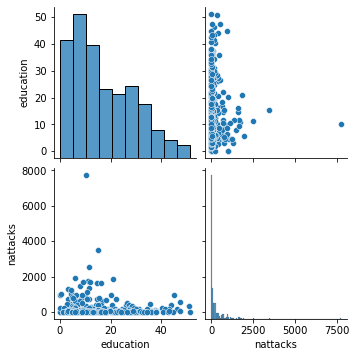

In [106]:
sns.pairplot(thirty_sec_df)

In [116]:
from sklearn.linear_model import LinearRegression

In [124]:
x = np.array(thirty_sec_df.education).reshape(-1, 1)
y = np.array(thirty_sec_df.nattacks.fillna(0)).reshape(-1, 1)
model = LinearRegression().fit(x, y)


In [126]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.020145101108153818
intercept: [401.4390015]
slope: [[-7.46268022]]


In [128]:
# correlation due to non linearity
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.14217940058774045, pvalue=0.019423950994094386)